In [39]:
import pandas as pd

#Uploaded the dataset
file_path = '/Users/khamaleshramesh/Downloads/ML Project/Cars_data.csv'
cars_data = pd.read_csv(file_path)


cars_data_info = cars_data.info()
cars_data_head = cars_data.head()

cars_data_info, cars_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

(None,
   Make       Model  Year             Engine Fuel Type  Engine HP  \
 0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
 1  BMW    1 Series  2011  premium unleaded (required)      300.0   
 2  BMW    1 Series  2011  premium unleaded (required)      300.0   
 3  BMW    1 Series  2011  premium unleaded (required)      230.0   
 4  BMW    1 Series  2011  premium unleaded (required)      230.0   
 
    Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
 0               6.0            MANUAL  rear wheel drive              2.0   
 1               6.0            MANUAL  rear wheel drive              2.0   
 2               6.0            MANUAL  rear wheel drive              2.0   
 3               6.0            MANUAL  rear wheel drive              2.0   
 4               6.0            MANUAL  rear wheel drive              2.0   
 
                          Market Category Vehicle Size Vehicle Style  \
 0  Factory Tuner,Luxury,High-Performance

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import pandas as pd
import numpy as np

# Preprocess the data
selected_features = ['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']
regression_data = cars_data[selected_features + ['MSRP']]

# Remove rows with missing values
regression_data = regression_data.dropna()

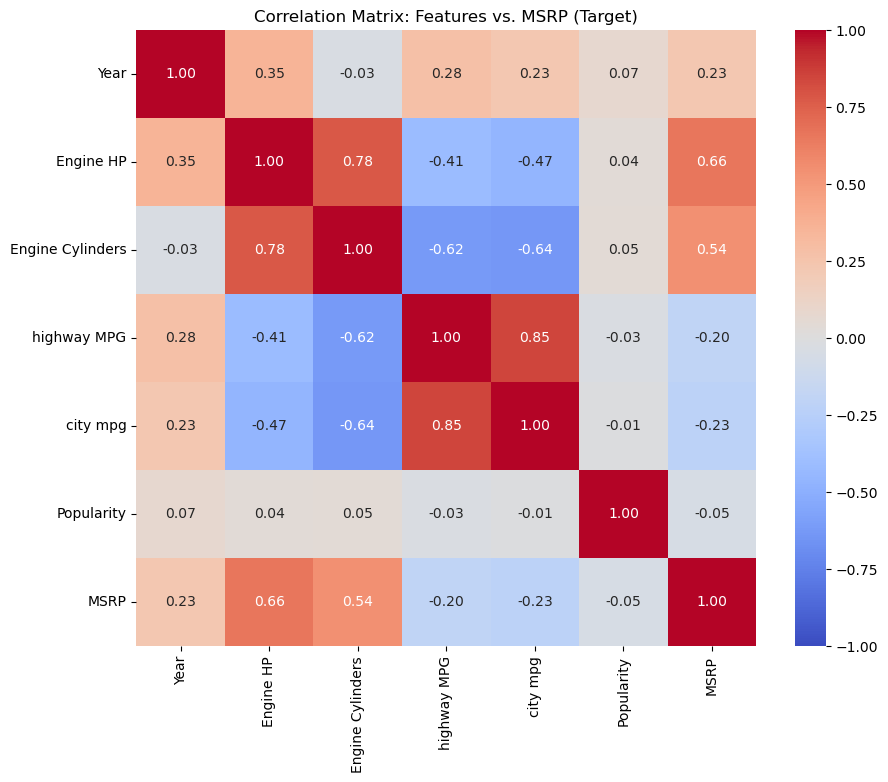

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation analysis
data_for_correlation = regression_data.copy()

#Correlation matrix
correlation_matrix = data_for_correlation.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix: Features vs. MSRP (Target)")
plt.show()



In [45]:
#Test Train split
X_features = regression_data[selected_features]
y_target = regression_data['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

In [47]:
# Train the XGBoost regression model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [51]:
#Predictions
y_predictions = xgb_regressor.predict(X_test)

#Model metrics
mse_score = mean_squared_error(y_test, y_predictions)
r2_score_value = r2_score(y_test, y_predictions)

print(f"Mean Squared Error: {mse_score}")
print(f"R² Score: {r2_score_value}")


Mean Squared Error: 542854600.099433
R² Score: 0.8275340357157641
